## Выжившие на Титанике

* Выжившие на Титанике: Описание
* Оценка: Набор данных
* Импорт инастроенные переменные: Изучение данных
* Характеристика: Классы пассажиров
* Характеристика: Пол
* Характеристика: Порт посадки
* Характеристика: Возраст
* Характеристика: Размер семьи

## Данные взяты с Kaggle

Описание, оценка и набор данных взяты с [сайта соревнований](https://www.kaggle.com/c/titanic-gettingStarted).

## Описание

![alt text](http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

Потопление RMS Титаника - одно из самых известных кораблекрушений в истории. 15 апреля 1912 года, во время своего первого плавания, Титаник потонул после столкновения с айсбергом, погибло 1502 из 2224 пассажиров и членов экипажа. Эта сенсационная трагедия потрясла международное сообщество и привела к улучшению правил безопасности для судов.

Одной из причин, почему кораблекрушение привело к такой потере жизни, было то, что не было достаточного количества спасательных шлюпок для пассажиров и членов экипажа. Хотя некоторая роль сыграла удача в выживании после крушения, некоторые группы людей были более вероятными для выживания, такие как женщины, дети и люди высшего класса.

В этом испытании мы просим вас завершить анализ, какие люди, скорее всего, выжили. В частности, мы просим вас использовать инструменты машинного обучения для прогнозирования, какие пассажиры выжили в этой трагедии.

## Оценка

Исторические данные были разделены на две группы: «тренировочный набор» и «тестовый набор». Для тренировочного набора мы предоставляем исход («истинное состояние») для каждого пассажира. Вы будете использовать этот набор данных для построения модели, которая будет генерировать прогнозы для тестового набора.
Для каждого пассажира в тестовом наборе вам нужно предсказать, выжил он или нет (0 - погиб, 1 - выжил). Ваш результат - это процент правильно предсказанных пассажиров.
Рейтинг Kaggle состоит из публичной и приватной части. 50% ваших прогнозов для тестового набора были случайным образом отнесены к публичному рейтингу (та же 50% для всех пользователей). Ваш балл на этой публичной части будет отображаться в рейтинге. В конце конкурса мы раскроем ваш балл на приватной части данных, которая определит победителя. Этот метод предотвращает пользователей от переобучения на рейтинге.

## Data Set

| File Name        | Available Formats |
|------------------|-------------------|
| train            | .csv (59.76 kb)   |
| gendermodel      | .csv (3.18 kb)    |
| genderclassmodel | .csv (3.18 kb)    |
| test             | .csv (27.96 kb)   |
| gendermodel      | .py (3.58 kb)     |
| genderclassmodel | .py (5.63 kb)     |
| myfirstforest    | .py (3.99 kb)     |

<pre>
ОПИСАНИЕ ПЕРЕМЕННЫХ:
survival        Выжившие
                (0 = Нет; 1 = Да)
pclass          Класс пассажира
                (1 = 1-ый; 2 = 2-ой; 3 = 3-ий)
name            Имя
sex             Пол
age             Возраст
sibsp           Количество братьев/сестер/супругов на борту
parch           Количество родителей/детей на борту
ticket          Номер билета
fare            Стоимость проезда
cabin           Каюта
embarked        Порт посадки
                (C = Шербур; Q = Квинстаун; S = Саутгемптон)
                

СПЕЦИАЛЬНЫЕ ЗАМЕЧАНИЯ:
P-class - это показатель социально-экономического статуса (СЭС)
 1-ый класс ~ высокий статус; 
 2-ой класс ~ средний статус; 
 3-ий класс ~ низкий статус
 
Возраст указан в годах; если возраст меньше одного года, то может быть дробным
Если возраст приблизительный, то указывается в формате xx.5
 
Относительно переменных, связанных с семьей (т.е. sibsp и parch), 
некоторые отношения были игнорированы. Ниже приведены определения, применяемые для sibsp и parch.
 
Брат/сестра: Брат, сестра, сводный брат или сводная сестра пассажира на борту Титаника
Супруг/супруга: Муж или жена пассажира на борту Титаника (отношения типа возлюбленных и помолвленных были игнорированы)
Родитель: Мать или отец пассажира на борту Титаника
Ребенок: Сын, дочь, пасынок или падчерица пассажира на борту Титаника
 
Другие родственники, такие как двоюродные братья/сестры, племянники/племянницы, тети/дяди и свояки, исключены из этого исследования. Некоторые дети путешествовали только с няней, поэтому для них parch=0. Кроме того, некоторые путешествовали с близкими друзьями или соседями из деревни, однако определения не поддерживают такие отношения.
</pre>

## Установка импортов и переменных

In [31]:
import pandas as pd
import numpy as np
import pylab as plt

# Глобальный размер по умолчанию для графиков matplotlib
plt.rc('figure', figsize=(10, 5))

# Размеры фигур matplotlib, содержащих подграфики
fizsize_with_subplots = (10, 10)

# Размеры гистограммных ячеек matplotlib
bin_size = 10

## Исследование данных

Считывание данных:

In [32]:
df_train = pd.read_csv(r'C:\Users\Admin\Documents\ipynb_checkpoints\data-science-ipython-notebooks-data-titanic\train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Просмотреть типы данных для каждого столбца:

In [34]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Тип 'object' в pandas является строкой, что вызывает проблемы с алгоритмами машинного обучения. Тут нет алгоритмов машинного обучения, но предпосылки изменений данных с object на int есть.

Получение основной информации о DataFrame:

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Возраст(age), каюта(cabin) и порт посадки имеют пропущенные значения(embarked). У каюты слишком много отсутствующих значений, в то время как мы, возможно, сможем найти значения для возраста и порта посадки на основе имеющихся данных.

Сгенерированные различные описательные статистики о DataFrame:

In [36]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Теперь, когда у нас есть общее представление о содержимом набора данных, мы можем более подробно изучить каждый столбец. Мы будем проводить исследовательский анализ данных и очищать данные, чтобы подготовить "функции", которые мы будем использовать в алгоритмах машинного обучения.

Построим несколько графиков для лучшего представления о каждом из них:

Text(0.5, 1.0, 'Гистограмма возрастов')

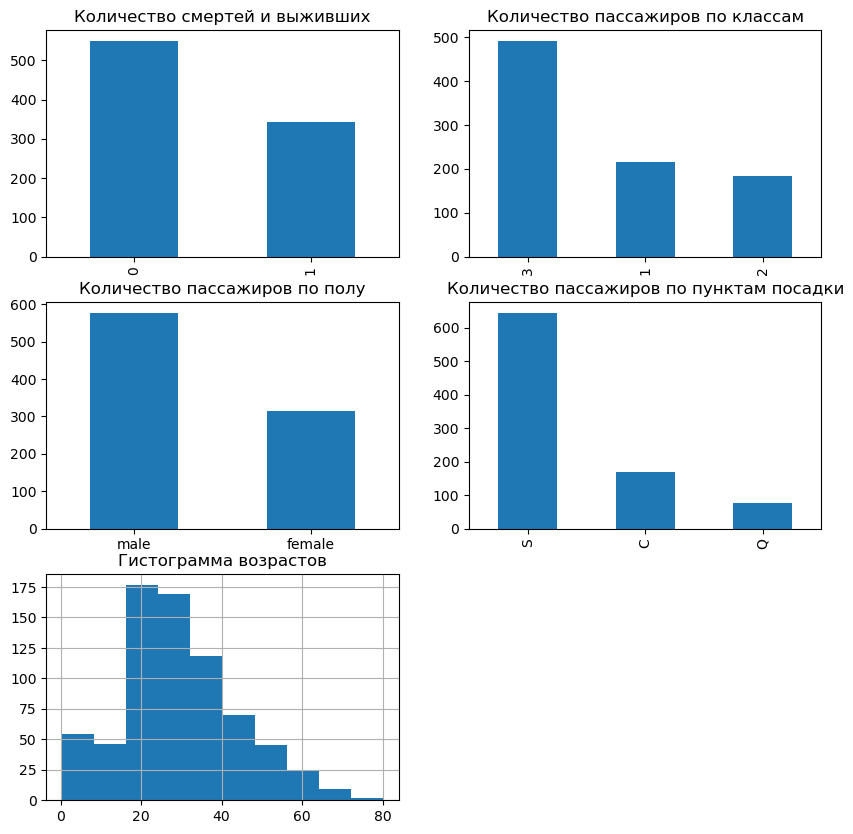

In [37]:
# Установка сетки графиков
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Постройка графика количества смертей и выживших
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Количество смертей и выживших')

# Постройка графика количества пассажиров по классам
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Количество пассажиров по классам')

# Постройка графика количества пассажиров по полу
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Количество пассажиров по полу')
plt.xticks(rotation=0)

# Постройка графика количества пассажиров по пунктам посадки
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Количество пассажиров по пунктам посадки')

# Постройка гистограмм возрастов
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Гистограмма возрастов')

Далее мы будем исследовать различные функции, чтобы посмотреть их влияние на выживаемость.

## Характеристика: Класс пассажиров

Из результатов нашего исследовательского анализа данных в предыдущем разделе видно, что есть три класса пассажиров: первый, второй и третий класс. Мы определим, какая часть пассажиров выжила в зависимости от их класса.

Построим кросс-таблицу Pclass и Survived:

In [38]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Построим график кросс-таблицы:

Text(0, 0.5, 'Уровень выживаемости')

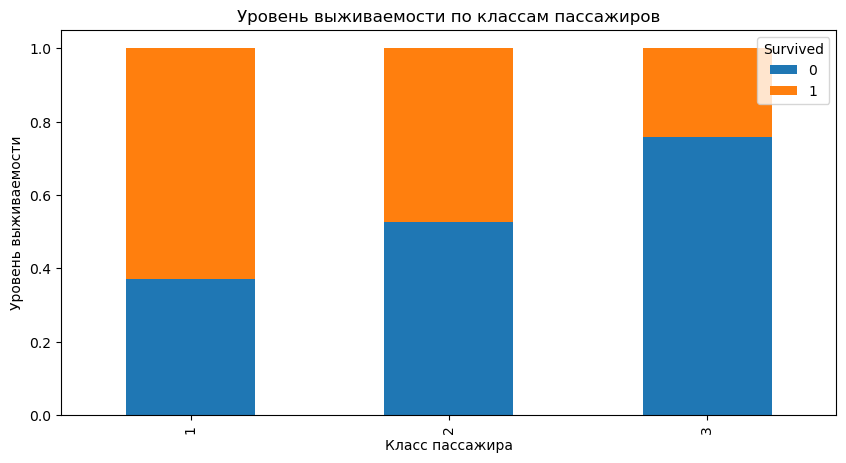

In [160]:
# Нормализуем кросс-таблицу, чтобы сумма составляла 1
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Уровень выживаемости по классам пассажиров')
plt.xlabel('Класс пассажира')
plt.ylabel('Уровень выживаемости')

Мы можем видеть, что класс пассажира имеет значительное влияние на то, выжил ли пассажир. Пассажиры первого класса имели самый высокий шанс выжить.

## Характеристика: Пол

Пол также мог оказать влияние на вероятность выживания пассажира. Нам потребуется преобразовать пол из строки в число.

Сгенерируем соответствие пола (Sex) из строки в числовое представление:

In [40]:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

Преобразуем пол (Sex) из строки в числовое представление:

In [41]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Построем стандартизированную таблицу сопряженности для переменных Sex_Val и Survived:

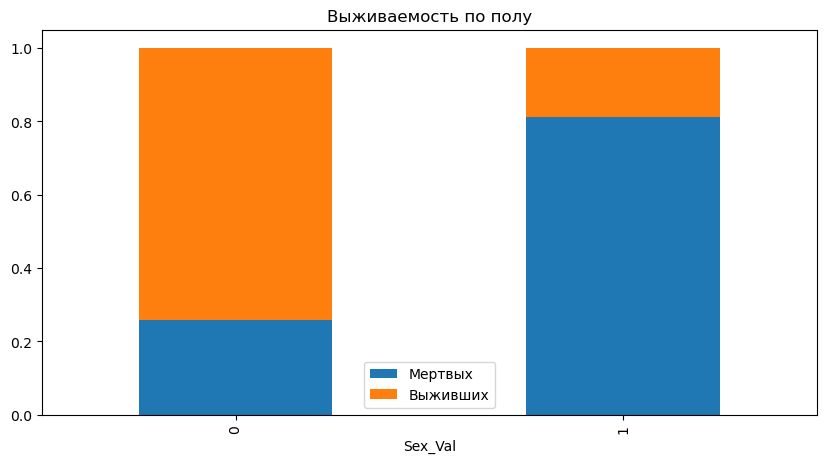

In [169]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Выживаемость по полу')
plt.legend(('Мертвых', 'Выживших'))

Большинство женщин выжили, в то время как большинство мужчин не выжило.

0 - Женщины

1 - Мужчины

Далее мы определим, можем ли мы получить какие-либо выводы о вероятности выживания, рассматривая одновременно пол (Sex) и класс (Pclass).

Посчитаем количество мужчин и женщин в каждом классе (Pclass):

In [43]:
# Get the unique values of Pclass:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print( 'M:', p_class, len(df_train[(df_train['Sex'] == 'male') & 
                             (df_train['Pclass'] == p_class)]))
    print( 'F:', p_class, len(df_train[(df_train['Sex'] == 'female') & 
                             (df_train['Pclass'] == p_class)]))

M: 1 122
F: 1 94
M: 2 108
F: 2 76
M: 3 347
F: 3 144


Построем график вероятности выживания в зависимости от пола (Sex) и класса (Pclass):

Text(0, 0.5, 'Выживаемость')

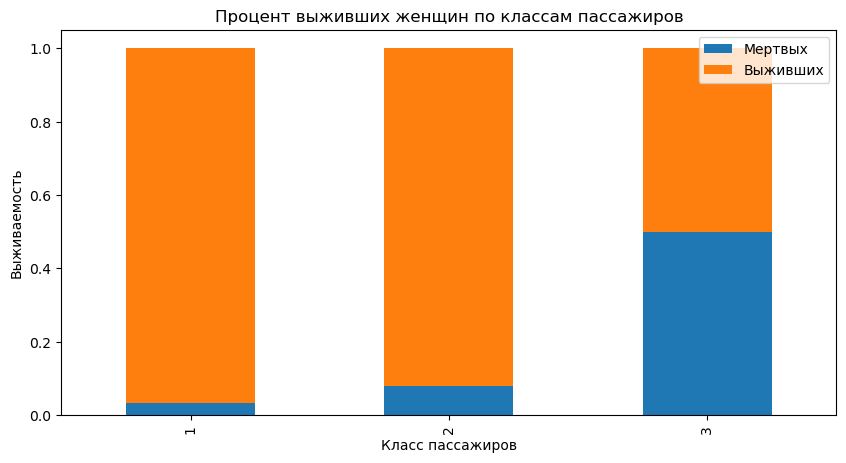

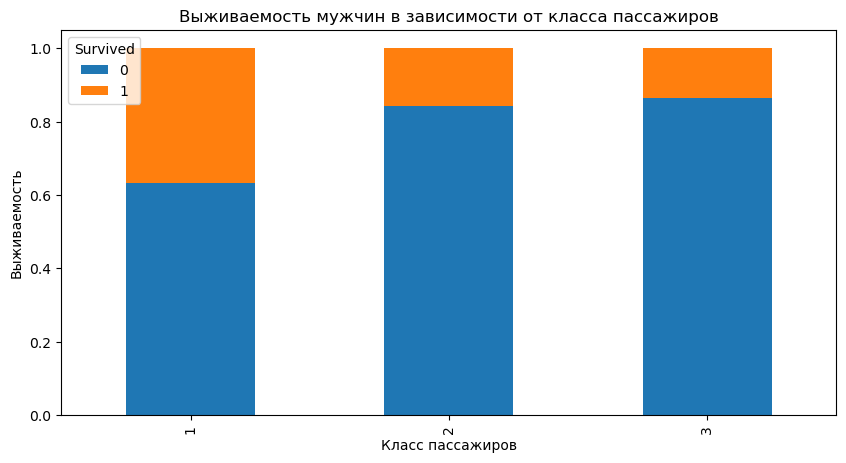

In [157]:
# Построем график вероятности выживания в зависимости от пола (Sex):
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Процент выживших женщин по классам пассажиров')
plt.xlabel('Класс пассажиров')
plt.ylabel('Выживаемость')
plt.legend(('Мертвых', 'Выживших'), loc='best')

# График выживаемости в зависимости от класса каюты
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Выживаемость мужчин в зависимости от класса пассажиров')
plt.xlabel('Класс пассажиров')
plt.ylabel('Выживаемость')

Большинство женщин, путешествовавших в первом и втором классах, выжили. Мужчины первого класса имели наибольший шанс на выживание.

## Характеристика: Порт посадки

Столбец "Embarked" может быть важной характеристикой, но отсутствие нескольких данных может вызвать проблемы для алгоритмов машинного обучения.

In [45]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


Готовлюсь преобразовать значения столбца "Embarked" из строкового представления в числовое представление.

In [56]:
# Получим уникальные значения столбца "Embarked"
embarked_locs = sorted(df_train['Embarked'].astype(str).unique())

embarked_locs_mapping = dict(zip(embarked_locs, 
                                 range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

{'C': 0, 'Q': 1, 'S': 2, 'nan': 3}

Преобразуем столбец "Embarked" из строкового представления в числовое представление, чтобы подготовить его для алгоритмов машинного обучения.

In [65]:
df_train['Embarked_Val'] = df_train['Embarked'].map(embarked_locs_mapping).dropna().astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2.0


Построим гистограмму для столбца "Embarked_Val":

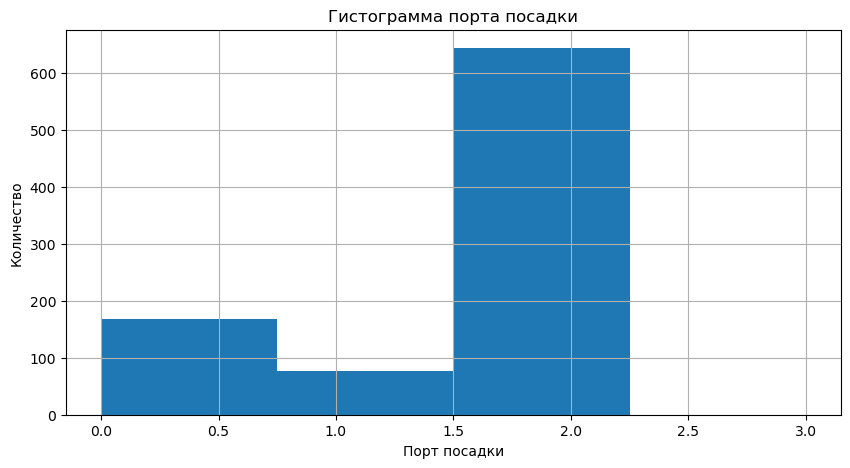

In [66]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title('Гистограмма порта посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Количество')
plt.show()

Поскольку подавляющее большинство пассажиров село на борт в порту 'S', мы присваиваем отсутствующие значения в поле Embarked значению 'S'.

In [94]:
if len(df_train['Embarked'].isnull() > 0):
    df_train.replace({'Embarked_Val' : 
                   { embarked_locs_mapping['nan'] : embarked_locs_mapping['S'] 
                   }
               }, 
               inplace=True)

Проверим, у нас больше нет значений NaN для Embarked_Val:

In [102]:
embarked_locs = sorted(df_train['Embarked_Val'].dropna().unique())
embarked_locs

[0.0, 1.0, 2.0]

У нас оставались значения NaN и мы удалили их с помощью функции .dropna()

Построим нормализованную перекрестную таблицу для столбцов Embarked_Val и Survived:

Text(0, 0.5, 'Выживаемость')

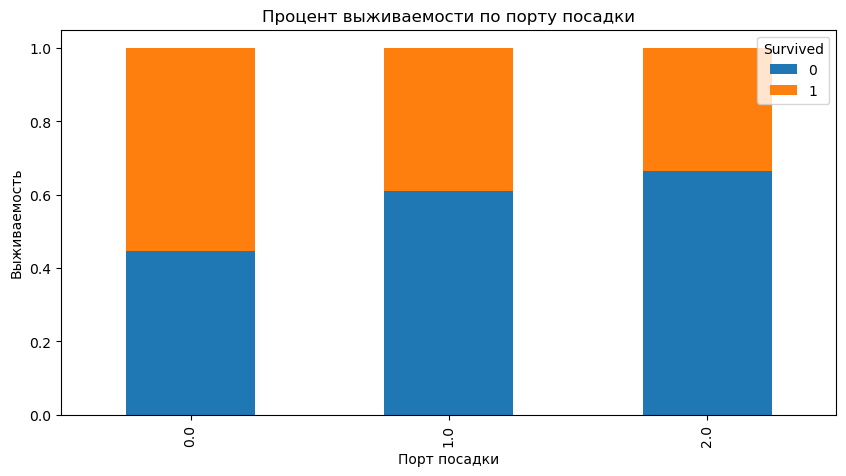

In [113]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Процент выживаемости по порту посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Выживаемость')

Похоже, что те, кто отправился в порт 'C': 1, имели самый высокий уровень выживаемости.

## Характеристика: Возраст

Столбец Возраст (Age) кажется важной характеристикой, но, к сожалению, в нем отсутствует много значений. Нам нужно заполнить пропущенные значения, так же, как мы сделали это с портом посадки (Embarked).

Фильтр для просмотра пропущенных значений Возраста (Age):

In [115]:
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


Определим типичный возраст для каждого класса пассажиров, учитывая столбец Sex_Val. Мы будем использовать медиану вместо среднего, потому что гистограмма возраста кажется смещенной вправо.

In [118]:
# Чтобы сохранить столбец Возраст (Age) без изменений, создайте его копию с названием AgeFill, 
# которую мы будем использовать для заполнения пропущенных значений возраста:
df_train['AgeFill'] = df_train['Age']

# Заполним столбец AgeFill:
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

C:\Users\Admin\AppData\Local\Temp\ipykernel_9832\1299121480.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: x.fillna(x.median()))


Ничего страшного, что у нас вышло предупреждение. 

Убедимся, что в столбце AgeFill не содержится пропущенных значений:

In [119]:
len(df_train[df_train['AgeFill'].isnull()])

0

Построим нормализованную перекрестную таблицу для столбцов AgeFill и Survived:

Text(0, 0.5, 'Возраст')

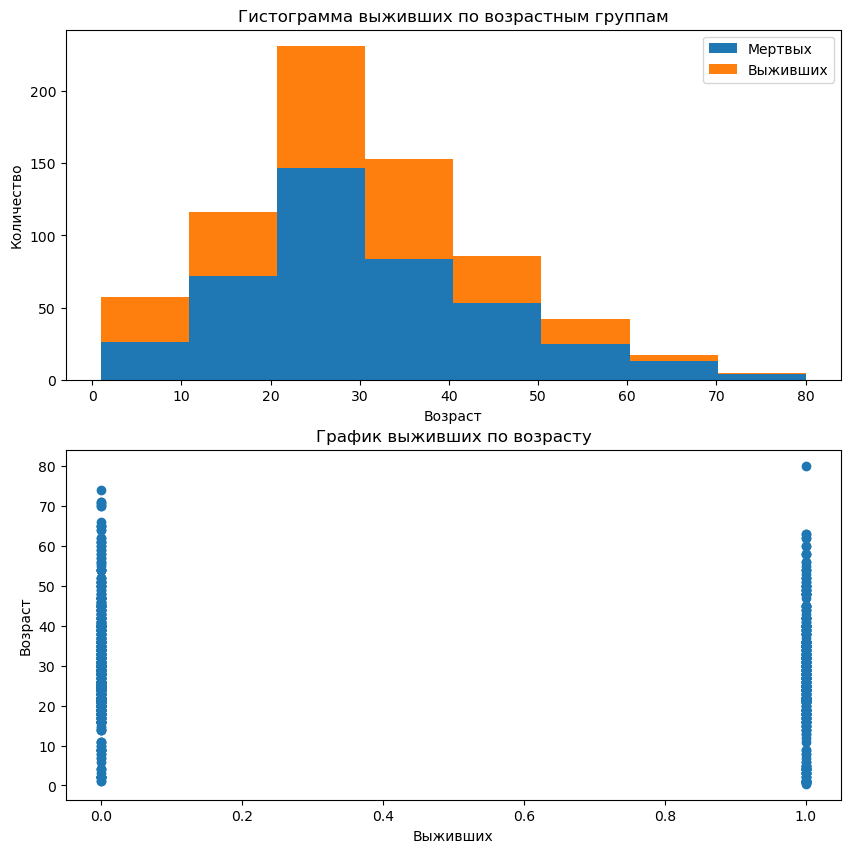

In [136]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)

# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])
axes[0].hist([df1, df2], 
             bins=int(max_age) // int(bin_size), 
             range=(1, max_age), 
             stacked=True)
axes[0].legend(('Мертвых', 'Выживших'), loc='best')
axes[0].set_title('Гистограмма выживших по возрастным группам')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество')

# Scatter plot Survived and AgeFill
axes[1].scatter(df_train['Survived'], df_train['AgeFill'])
axes[1].set_title('График выживших по возрасту')
axes[1].set_xlabel('Выживших')
axes[1].set_ylabel('Возраст')

К сожалению, приведенные выше графики не кажутся ясно отражающими какие-либо выводы. Мы продолжим исследования.

Построим график плотности распределения возраста (AgeFill) по классам пассажиров (Pclass):

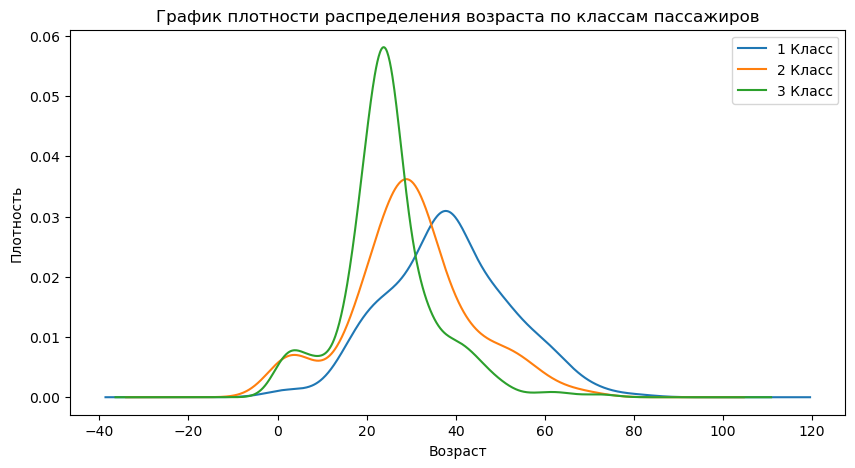

In [143]:
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('График плотности распределения возраста по классам пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend(('1 Класс', '2 Класс', '3 Класс'), loc='best')

При анализе плотности распределения возраста (AgeFill) по классам пассажиров (Pclass), мы видим, что пассажиры первого класса в целом были старше, чем пассажиры второго класса, которые, в свою очередь, были старше пассажиров третьего класса. Мы выяснили, что пассажиры первого класса имели более высокий уровень выживаемости, чем пассажиры второго класса, которые, в свою очередь, имели более высокий уровень выживаемости, чем пассажиры третьего класса.

<Axes: >

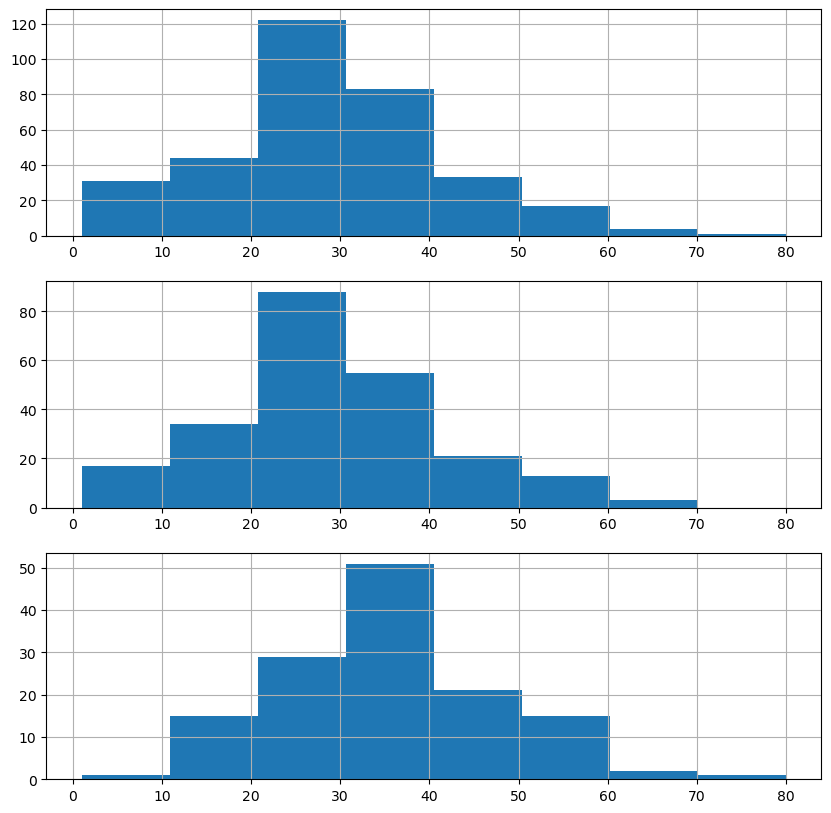

In [145]:
# Настроика сетки графиков
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# Постройка гистограммы AgeFill для выживших
plt.subplot2grid(fig_dims, (0, 0))
survived_df = df_train[df_train['Survived'] == 1]
survived_df['AgeFill'].hist(bins=int(max_age) // int(bin_size), range=(1, max_age))

# Постройка гистограммы AgeFill для женщин
plt.subplot2grid(fig_dims, (1, 0))
females_df = df_train[(df_train['Sex_Val'] == 0) & (df_train['Survived'] == 1)]
females_df['AgeFill'].hist(bins=int(max_age) // int(bin_size), range=(1, max_age))

# Постройка гистограммы AgeFill для пассажиров первого класса
plt.subplot2grid(fig_dims, (2, 0))
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]
class1_df['AgeFill'].hist(bins=int(max_age) // int(bin_size), range=(1, max_age))

На первом графике мы видим, что большинство выживших находятся в возрастных диапазонах от 20 до 30 лет, что может быть объяснено следующими двумя графиками. 

Второй график показывает, что большинство женщин находятся в возрасте от 20 до 30 лет. 

Третий график показывает, что большинство пассажиров первого класса находятся в возрасте от 30 до 40 лет.

## Характеристика: Размер семьи

Признаковая инженерия заключается в создании новых признаков или модификации уже существующих признаков, которые могут быть выгодны для алгоритма машинного обучения.

Определим новый признак FamilySize, который будет суммой Parch (количество родителей или детей на борту) и SibSp (количество братьев, сестер или супругов):

In [146]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_0.0,Embarked_Val_1.0,Embarked_Val_2.0,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2.0,0,0,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0.0,1,0,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2.0,0,0,1,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2.0,0,0,1,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2.0,0,0,1,35.0,0


Построим гистограмму для признака FamilySize:

Text(0.5, 1.0, 'Гистограмма размера семьи')

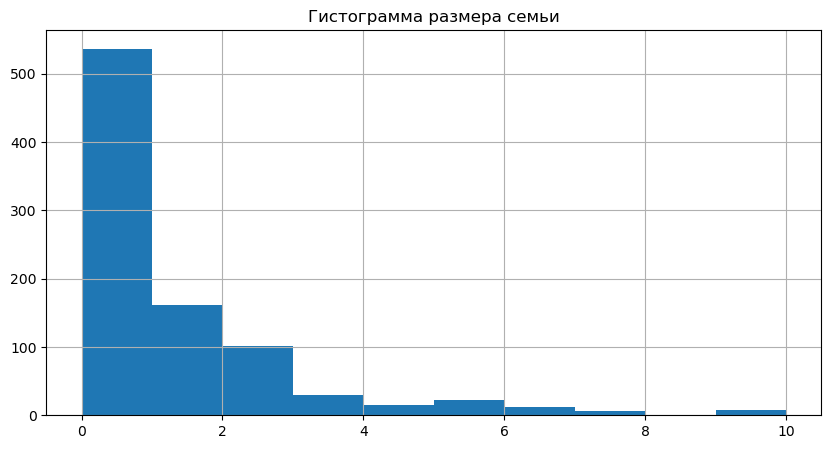

In [148]:
df_train['FamilySize'].hist()
plt.title('Гистограмма размера семьи')

Построим гистограмму AgeFill сегментированную по Survived:

Text(0.5, 1.0, 'Гистограмма размера семьи')

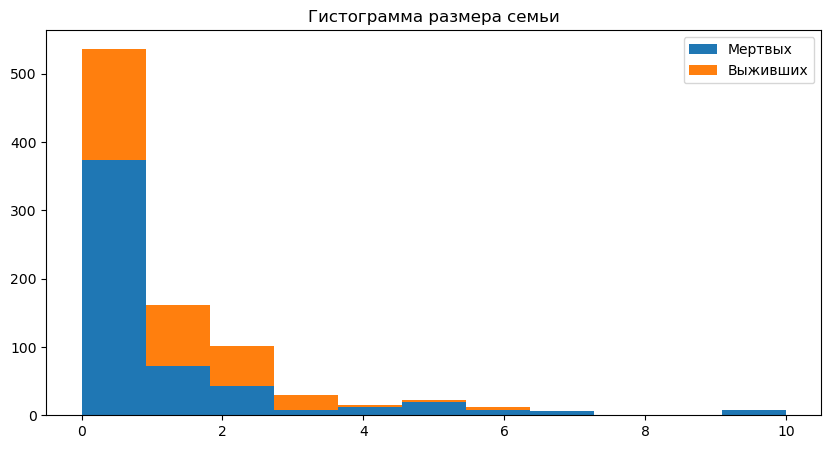

In [150]:
# Get the unique values of Embarked and its maximum
family_sizes = sorted(df_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 0]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Мертвых', 'Выживших'), loc='best')
plt.title('Гистограмма размера семьи')

Исходя из гистограмм, не сразу видно, какое влияние оказывает размер семьи (FamilySize) на выживаемость.

Дополнительные признаки, которые мы можем разработать, могут быть связаны с колонкой Name, например, почетные или простые титулы могут дать подсказки и улучшить предсказательную силу для выживаемости мужчин.